In [1]:
from google.colab import files
uploaded = files.upload()

Saving rainfall in india 1901-2015.csv to rainfall in india 1901-2015.csv


In [25]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
import warnings
warnings.filterwarnings("ignore")

In [14]:
df = pd.read_csv('rainfall in india 1901-2015.csv')
df.rename(columns={'SUBDIVISION': 'STATE'}, inplace=True)
df = df[['STATE', 'YEAR', 'ANNUAL']]
df.dropna(inplace=True)

In [100]:
forecast_years = list(range(2025, 2051))
forecast_df = pd.DataFrame()

In [101]:
states = df['STATE'].unique()

for state in states:
    state_data = df[df['STATE'] == state]
    state_data = state_data.groupby('YEAR')['ANNUAL'].mean().reset_index()
    state_data.set_index('YEAR', inplace=True)


    model = SARIMAX(state_data, order=(1,1,1), seasonal_order=(1,0,1,12), enforce_stationarity=False, enforce_invertibility=False)
    results = model.fit(disp=False)


    future = results.get_forecast(steps=26)
    predicted = future.predicted_mean
    predicted.index = forecast_years


    temp_df = pd.DataFrame({
        'YEAR': forecast_years,
        'STATE': state,
        'PREDICTED_RAINFALL': predicted.values
    })
    forecast_df = pd.concat([forecast_df, temp_df], ignore_index=True)


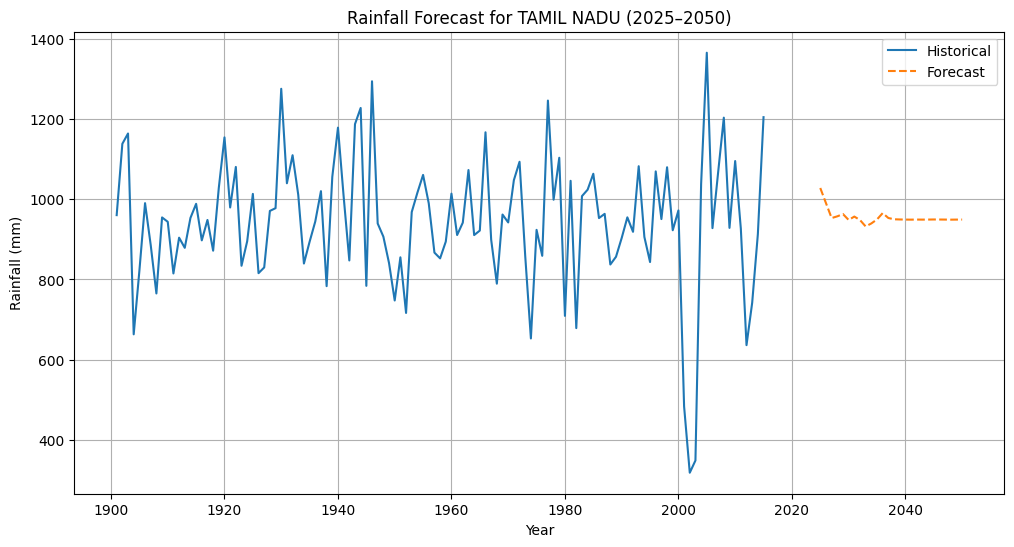

In [102]:
forecast_df.head()


forecast_df.to_csv('Statewise_Rainfall_Forecast_2025_to_2050.csv', index=False)


sample_state = 'TAMIL NADU'
state_actual = df[df['STATE'] == sample_state].groupby('YEAR')['ANNUAL'].mean()
state_forecast = forecast_df[forecast_df['STATE'] == sample_state].set_index('YEAR')

plt.figure(figsize=(12,6))
plt.plot(state_actual.index, state_actual.values, label='Historical')
plt.plot(state_forecast.index, state_forecast['PREDICTED_RAINFALL'], label='Forecast', linestyle='--')
plt.title(f"Rainfall Forecast for {sample_state} (2025–2050)")
plt.xlabel("Year")
plt.ylabel("Rainfall (mm)")
plt.legend()
plt.grid(True)
plt.show()

In [97]:
print(forecast_df.columns)


Index(['YEAR', 'Forecasted Rainfall'], dtype='object')


In [98]:
forecast_df.rename(columns={'value': 'PREDICTED_RAINFALL'}, inplace=True)


In [96]:
forecast = results.get_forecast(steps=15)
forecast_mean = forecast.predicted_mean

forecast_years = list(range(2025, 2025 + len(forecast_mean)))

forecast_df = pd.DataFrame({
    'YEAR': forecast_years,
    'Forecasted Rainfall': forecast_mean
})

display(forecast_df)


,YEAR,Forecasted Rainfall
104,2025,3023.320527
105,2026,3024.698226
106,2027,3018.212025
107,2028,3023.157214
108,2029,3032.346906
109,2030,3019.488406
110,2031,3028.785557
111,2032,3038.666719
112,2033,3033.910422
113,2034,3038.130633


In [94]:
print(df.columns)


Index(['STATE', 'YEAR', 'ANNUAL'], dtype='object')


In [95]:

states_to_compare = ['TAMIL NADU', 'KERALA', 'HIMACHAL PRADESH', 'JHARKHAND', 'TELANGANA', 'ANDAMAN & NICOBAR ISLANDS']


selected_states_data = df[df['STATE'].isin(states_to_compare)]


selected_states_data['ANNUAL_RAINFALL'] = selected_states_data.iloc[:, 2:14].sum(axis=1)
grouped_data = selected_states_data.groupby(['STATE', 'YEAR'])['ANNUAL_RAINFALL'].sum().reset_index()


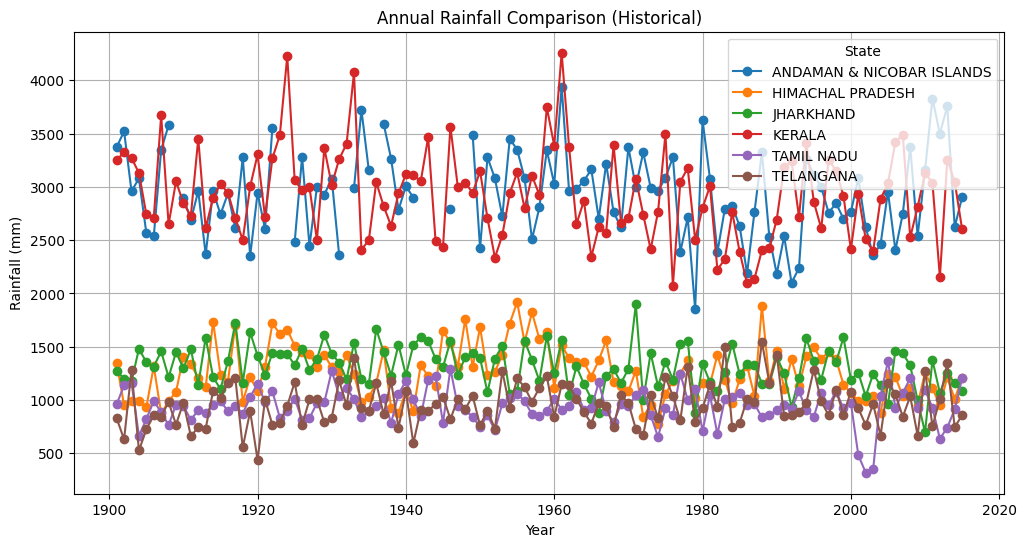

,STATE,YEAR,ANNUAL
0,ANDAMAN & NICOBAR ISLANDS,1901,3373.2
1,ANDAMAN & NICOBAR ISLANDS,1902,3520.7
2,ANDAMAN & NICOBAR ISLANDS,1903,2957.4
3,ANDAMAN & NICOBAR ISLANDS,1904,3079.6
4,ANDAMAN & NICOBAR ISLANDS,1905,2566.7
...,...,...,...
4111,LAKSHADWEEP,2011,1533.7
4112,LAKSHADWEEP,2012,1405.5
4113,LAKSHADWEEP,2013,1426.3
4114,LAKSHADWEEP,2014,1395.0


In [92]:

pivot_df = grouped_data.pivot(index='YEAR', columns='STATE', values='ANNUAL_RAINFALL')


pivot_df.plot(figsize=(12, 6), marker='o')
plt.title("Annual Rainfall Comparison (Historical)")
plt.ylabel("Rainfall (mm)")
plt.xlabel("Year")
plt.legend(title="State")
plt.grid(True)
plt.show()

from IPython.display import display
display(df)


In [49]:
df.columns = df.columns.str.strip().str.upper()  # removes extra spaces and makes uppercase


In [55]:
from statsmodels.tsa.api import ExponentialSmoothing

forecast_results = {}

for state in states_to_compare:
    try:
        state_data = pivot_df[state].dropna()
        model = ExponentialSmoothing(state_data, trend='add', seasonal=None).fit()
        forecast = model.forecast(5)
        forecast_results[state] = forecast
    except Exception as e:
        print(f"Skipping {state} due to error: {e}")


In [60]:
print(df['STATE'].unique())
print("Total States:", len(df['STATE'].unique()))


['ANDAMAN & NICOBAR ISLANDS' 'ARUNACHAL PRADESH' 'ASSAM & MEGHALAYA'
 'NAGA MANI MIZO TRIPURA' 'SUB HIMALAYAN WEST BENGAL & SIKKIM'
 'GANGETIC WEST BENGAL' 'ORISSA' 'JHARKHAND' 'BIHAR' 'EAST UTTAR PRADESH'
 'WEST UTTAR PRADESH' 'UTTARAKHAND' 'HARYANA DELHI & CHANDIGARH' 'PUNJAB'
 'HIMACHAL PRADESH' 'JAMMU & KASHMIR' 'WEST RAJASTHAN' 'EAST RAJASTHAN'
 'WEST MADHYA PRADESH' 'EAST MADHYA PRADESH' 'GUJARAT REGION'
 'SAURASHTRA & KUTCH' 'KONKAN & GOA' 'MADHYA MAHARASHTRA' 'MATATHWADA'
 'VIDARBHA' 'CHHATTISGARH' 'COASTAL ANDHRA PRADESH' 'TELANGANA'
 'RAYALSEEMA' 'TAMIL NADU' 'COASTAL KARNATAKA' 'NORTH INTERIOR KARNATAKA'
 'SOUTH INTERIOR KARNATAKA' 'KERALA' 'LAKSHADWEEP']
Total States: 36


In [67]:
five_states = ['Tamil Nadu', 'Maharashtra', 'Kerala', 'Karnataka', 'Gujarat']
df_five = df[df['STATE'].isin(five_states)]


In [79]:
pivot_df = df_five.pivot(index='YEAR', columns='STATE', values='ANNUAL')


In [73]:
print(pivot_df.columns)
print(pivot_df.head())


Index(['ANDAMAN & NICOBAR ISLANDS', 'HIMACHAL PRADESH', 'JHARKHAND', 'KERALA',
       'TAMIL NADU', 'TELANGANA'],
      dtype='object', name='STATE')
STATE  ANDAMAN & NICOBAR ISLANDS  HIMACHAL PRADESH  JHARKHAND  KERALA  \
YEAR                                                                    
1901                      3373.2            1345.1     1274.5  3248.6   
1902                      3520.7             951.6     1197.6  3326.6   
1903                      2957.4             993.3     1174.3  3271.2   
1904                      3079.6             987.6     1480.7  3129.7   
1905                      2566.7             930.2     1354.7  2741.6   

STATE  TAMIL NADU  TELANGANA  
YEAR                          
1901        960.3      827.7  
1902       1138.2      630.4  
1903       1163.9     1283.4  
1904        663.1      526.7  
1905        821.1      724.9  
